In [1]:
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon

from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

In [3]:
def visualize_coco(json_file):
    # Load COCO annotations
    coco = COCO(json_file)

    # Get category mapping
    cats = coco.loadCats(coco.getCatIds())
    cat_map = {cat['id']: cat['name'] for cat in cats}
    cmap = plt.cm.get_cmap('hsv', len(cat_map))  # Create a color map with as many colors as classes

    # Get image information
    img_ids = coco.getImgIds()
    for img_id in img_ids[:5]:
        # Load image data
        img_info = coco.loadImgs(img_id)[0]
        img_path = img_info['file_name']
        img = Image.open('trainPartCropped/' + img_path)

        # Load annotations for the image
        ann_ids = coco.getAnnIds(imgIds=img_info['id'])
        annotations = coco.loadAnns(ann_ids)

        # Create figure and axes
        fig, ax = plt.subplots(1)
        ax.imshow(img)

        # Plot bounding boxes, labels, and segmentation masks
        for ann in annotations:
            color = cmap(ann['category_id'] % len(cats))  # Get color from color map using category id

            bbox = ann['bbox']
            label = cat_map[ann['category_id']]
            rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
            ax.text(bbox[0], bbox[1], label, bbox=dict(facecolor=color, alpha=0.5))

            if 'segmentation' in ann:
                segmentation = ann['segmentation']
                if isinstance(segmentation, list):
                    for polygon in segmentation:
                        poly = np.array(polygon).reshape((int(len(polygon) / 2), 2))
                        ax.add_patch(Polygon(poly, facecolor='none', edgecolor=color, linewidth=1))
                else:
                    rle = maskUtils.frPyObjects(segmentation, img_info['height'], img_info['width'])
                    mask = maskUtils.decode(rle)
                    ax.imshow(mask, alpha=0.3, cmap='gray')

        plt.axis('off')
        plt.show()

loading annotations into memory...
Done (t=0.26s)
creating index...
index created!


/tmp/ipykernel_162676/3618640770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(cat_map))  # Create a color map with as many colors as classes


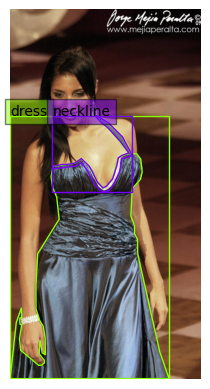

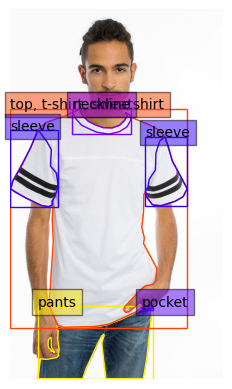

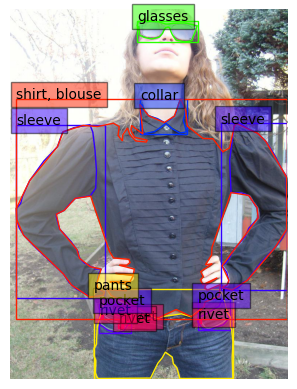

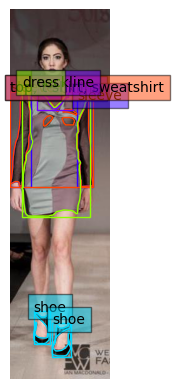

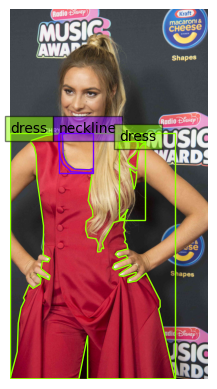

In [4]:
# Example usage
json_file_path = 'trainPartCropped_coco.json'
visualize_coco(json_file_path)

## COCO Annotation Exploration

[link](https://leimao.github.io/blog/Inspecting-COCO-Dataset-Using-COCO-API/)

In [5]:
%matplotlib inline

import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO

loading annotations into memory...
Done (t=0.77s)
creating index...
index created!
Number of Unique Categories: 46
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
Categories Names:
['shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel']
Category ID -> Category Name:
Category ID: 1, Category Name: shirt, blouse, Supercategory: upperbody
Category Name -> ID:
Category Name: sweater, Category I

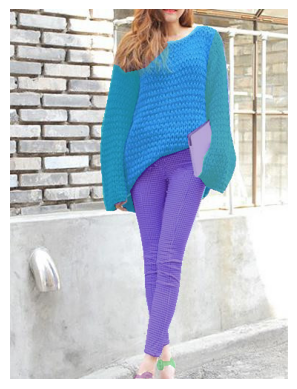

Image ID: 264, File Name: 3d0a084617009c0cdfd3e32a0f98f5b6.jpg


In [ ]:
def main():

    coco_annotation_file_path = "trainPart_coco.json"

    coco_annotation = COCO(annotation_file=coco_annotation_file_path)

    # Category IDs.
    cat_ids = coco_annotation.getCatIds()
    print(f"Number of Unique Categories: {len(cat_ids)}")
    print("Category IDs:")
    print(cat_ids)  # The IDs are not necessarily consecutive.

    # All categories.
    cats = coco_annotation.loadCats(cat_ids)
    cat_names = [cat["name"] for cat in cats]
    print("Categories Names:")
    print(cat_names)

    # Category ID -> Category Name.
    query_id = cat_ids[0]
    query_annotation = coco_annotation.loadCats([query_id])[0]
    query_name = query_annotation["name"]
    query_supercategory = query_annotation["supercategory"]
    print("Category ID -> Category Name:")
    print(
        f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
    )

    # Category Name -> Category ID.
    query_name = cat_names[2]
    query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
    print("Category Name -> ID:")
    print(f"Category Name: {query_name}, Category ID: {query_id}")

    # Get the ID of all the images containing the object of the category.
    img_ids = coco_annotation.getImgIds(catIds=[query_id])
    print(f"Number of Images Containing {query_name}: {len(img_ids)}")

    # Pick one image.
    for i in img_ids[:5]:
    
        img_id = i # img_ids[2]
        img_info = coco_annotation.loadImgs([img_id])[0]
        img_file_name = img_info["file_name"]
        # print(f'Image info: {img_info}')
        # img_url = img_info["coco_url"]
        print(
            f"Image ID: {img_id}, File Name: {img_file_name}"
        )
    
        # Get all the annotations for the specified image.
        ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
        anns = coco_annotation.loadAnns(ann_ids)
        # print(f"Annotations for Image ID {img_id}:")
        # print(anns)
    
        # Use URL to load image.
        # im = Image.open(requests.get(img_url, stream=False).raw)
        im = Image.open('trainPart/' + img_file_name)
        
    
        # Save image and its labeled version.
        plt.axis("off")
        plt.imshow(np.asarray(im))
        # plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
        
        # Plot segmentation and bounding box.
        coco_annotation.showAnns(anns, draw_bbox=False)
        # plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)
        plt.show()
    return


if __name__ == "__main__":

    main()